# Numerical Methods of Approximation for Ordinary Differential Equations

### Michael Humkey, Paul Taylor, Denis Andrusik, Jian Lan

## The Problem

For many equations, it may be difficult to integrate, some are even impossible to integrate by normal means. So how can we model, if roughly the behavior of the solution? In many applications where solutions are needed, a numerical approximation can be made use of to similar effect as the symbolic solution. Numerical approximations though inexact can be made use of on any ordinary differential equation.
	Some such methods include Euler’s method, Runge-Kutta methods and other Linear Multistep Methods.


## Why should we care?

* Without using numerical methods we wouldn’t be able to approximate exact answers for uses in things like graphs and comparative data sets. 
* Easily used to graphically represent data in computers etc
* Engineering is a main source where numeric approximations to solutions are sufficient. 
* A series expansion from calculus is an alternative method. 
* When are these used? 
  * Predictive modeling

  * Simulations

  * Game engines

  
  
  [modeling]: http://hyperphysics.phy-astr.gsu.edu/hbase/imgmec/tra12.gif "modeling"
  [simulation]: https://i.ytimg.com/vi/MnHzmcF3-4o/maxresdefault.jpg "sim"
  [engine]: https://s-media-cache-ak0.pinimg.com/originals/5c/52/87/5c5287be98289fb6cfc4fc1424a3c050.jpg "engine"


## Modeling the Problem

  * ### Initial Value Problem
  An initial value problem is an ordinary differential equation together with some initial value, or initial condition.
    Eg.   dy/dx= 10 - x ,   y(0) = 0 
  * ### Boundary Value Problem

## Issues and Limitations
* The amount of computation required to find exact solutions is often inefficient and cumbersome relative to use of finding approximate values.
* Through finding just the approximate values we are able to better utilize the power of computers to give us real time data.
* For non-linear problems (Van der Pol oscillator) there is a lack of an analytic solution, so a computer generated approximation is our only option.

## Solving the Problem
* ### Euler's Method
* ### Midpoint Method
* ### Runge-Kutta Method

## Demo
We'll be using matplotlib to display our results. Let's start by importing pyplot.

In [1]:
import matplotlib.pyplot as plt

Next we'll write functions to handle all of the above methods.

In [2]:
# graphwin: the window to plot on
# func: the function to model
# y: y initial
# t t initial
# h: step size
# n: number of points desired
#
# Uses Euler's method to approximate a function and plot it
def euler(func, y, t, h, n):
    y = n*[y]
    t = n*[t]
    for i in range (0, n-1):
        y[i+1]=(y[i] + h * func(t[i], y[i]))
        t[i+1]=t[i]+ h
    return {'t': t, 'y': y}

In [3]:
# graphwin: the window to plot on
# func: the function to model
# y: y initial
# t t initial
# h: step size
# n: number of points desired
#
# Uses the midpoint method to approximate a function and plot it
def midmethod(func, y, t, h, n):
    y = n*[y]
    t = n*[t]
    for i in range (0, n-1):
        fn = func(t[i], y[i])
        y[i+1]=(y[i] + h * float(func(t[i] + h/2, y[i] + (h/2)*fn)))
        t[i+1]=t[i]+h
    return {'t': t, 'y': y}

In [4]:
# graphwin: the window to plot on
# func: the function to model
# y: y initial
# t t initial
# h: step size
# n: number of points desired
#
# Uses the Runge-Kutta method to approximate a function and plot it
def rk4(func, y, t, h, n):
    y = n*[y]
    t = n*[t]
    for i in range (0, n-1):
        y[i+1]=(y[i] + h * t4(func, t[i], y[i], h))
        t[i+1]=t[i]+h
    return {'t': t, 'y': y}

# Produces the term t4 for the above calculation
def t4(func, t, y, h):
    k1 = func(t, y)
    k2 = func(t + h/2, y + (h/2) * k1)
    k3 = func(t + h/2, y + (h/2) * k2)
    k4 = func(t + h, y + h * k3)
    return 1/6 * (k1 + 2 * (k2 + k3) + k4)
        

Next we need a function to model.

In [5]:
# models the function y+t 
def somefunction(t, y):
    return (y + t) 

Next we need to measure the time

In [6]:
from timeit import default_timer as time

And finally we can produce the graphs and time each function

0.00021643799846060574 0.00015342600090662017 0.0002078769975923933


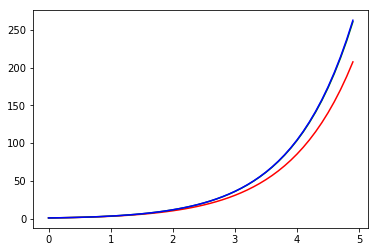

In [16]:
def callall(func, y=1, t=0, h=0.1, n=500):
    
    t1 = time()
    p1 = euler(func, y, t, h, n)
    t1 = time() - t1
    
    t2 = time()
    p2 = midmethod(func, y, t, h, n) 
    t2 = time() - t2
    
    t3 = time()
    p3 = rk4(func, y, t, h, n)
    t3 = time() - t3
    
    print(t1, t2, t3)
    return p1, p2, p3

p1, p2, p3 = callall(somefunction, h=0.1, n=50)

# plt.figure(0)
# plt.title("Euler's Method")
plt.plot(p1['t'], p1['y'], 'r')
# plt.figure(1)
# plt.title("Midpoint Method")
plt.plot(p2['t'], p2['y'], 'g')
# plt.figure(2)
# plt.title("Runge-Kutta Method")
plt.plot(p3['t'], p3['y'], 'b')
plt.show()

## Extensions
* Finding approximate solutions through application of Taylor Series